### Question 1

Consider a single isotropic antenna A located at the origin, transmitting a signal of frequency fc along with a target T at a distance d from the antenna as shown in Figure 1. Derive an expression for the received signal at the target assuming the movement of the target is negligible.

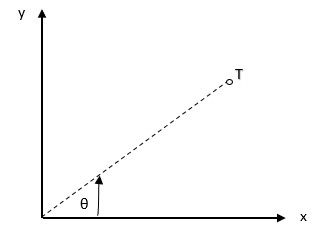


T=Target

A=Isotropic Antenna Element

$V_{TX}$=$Esin(2$$\pi$$f_{C}t)$

$V_{RX}$=$Esin(2$$\pi$$f_{C}+/-f_{d})(t-\frac{d}{c})$

Assuming the movement of the target is

$f_d=0$

$V_{RX}=Esin[2\pi f_c(t-\frac{d}{c})]$

> $=Esin[2\pi f_ct-2\pi\frac{f_c}{d}d]$

> $=Esin[2\pi f_ct-\frac{2\pi}{\lambda_c}d]$



In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mb
from matplotlib import pyplot as plt
from scipy.signal import butter, lfilter, freqz
import math
from scipy.fft import fft,fftfreq,ifft,fftshift



Lambda=300.0
R=763.9437268410976
Phase shift at Rx=4188.790204786391


Text(0, 0.5, 'Magnitude')

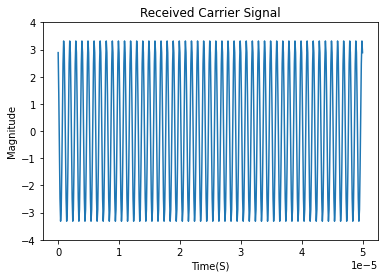

In [ ]:
fc=10**6
f0=960
fm=30
d=2*10**5
theta=30
c=3*10**8

lambdaA=c/fc
print("Lambda="+str(lambdaA))
R=8*lambdaA/(math.pi)
print("R="+str(R))
M=0.3
E=1.0/M
delta=16
freqDev=delta*fm

fs=10*fc
t=np.arange(0,1,1/fs)
phi=(2*math.pi/lambdaA)*d
print("Phase shift at Rx="+str(phi))
angleFc=2*math.pi*fc
x=angleFc*t
v0=E*np.sin(x-phi)

plt.plot(t[:501],v0[:501])
plt.ylim(-4,4)
plt.title('Received Carrier Signal')
plt.xlabel('Time(S)')
plt.ylabel('Magnitude')

###Question 2
Two isotropic antenna elements are now rotated with a frequency fm in a circle of radius R centered at the origin as shown in Figure 2. The two antennas are transmitting signals of frequency fc − f0 and fc + f0 respectively . Using the expres- sion obtained in 1 derive an expression for the signal received by the target. Note: you must not assume the position vectors to the two antennas from the target is parallel. You may take R << d Include all assumptions made.

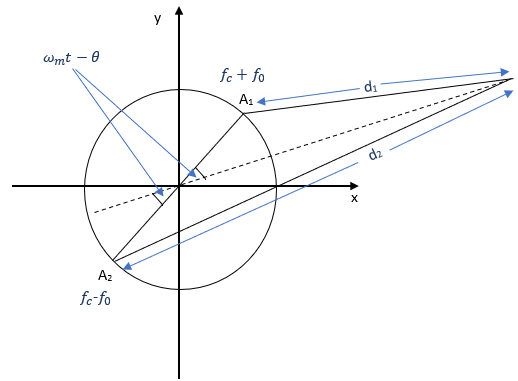


**$A_1$**

$V_{TX_1}=Esin(2\pi(f_c+f_0)t)$
$V_{TX_1}=Esin(2\pi(f_c+f_0)(t-\frac{d_1}{c}))$

>$=Esin(2\pi (f_c+f_0)(t-\frac{d_1}{c}))$

>$=Esin(2\pi (f_c+f_0)t-2\pi(f_c+f_0)\frac{d_1}{c}$

Since $f_c>>f_0$ we can assume,

>$2\pi(f_c+f_0)\frac{d_1}{c}=2\pi f_c\frac{d_1}{c}=\phi$

$d_1=\sqrt{[d-Rcos(\omega_mt -\theta)]^2+R^2sin^2(\omega_mt-\theta)}$

$[d-Rcos(\omega_mt-\theta)]^2=d^2$
> Since, $d^2>>R^2sin^2(\omega_mt-\theta)$,

$d_1=d-Rcos(\omega_mt-\theta)$

$\phi_1=2\pi\frac{f_c}{c}(d-Rcos(\omega_mt-\theta))$

> $=\frac{2\pi d}{\lambda_c}-\frac{2\pi}{\lambda_c}Rcos(\omega_mt-\theta)$

Similarly, we can show that for $A_2$,

$V_{RX_2}=Esin(2\pi(f_c-f_0)t-2\pi(f_c-f0)\frac{d_2}{c}$

> $=Esin(2\pi(f_c-f_0)t-2\pi f_c\frac{d_2}{c})$

Here,

$\phi_2=2\pi f_c\frac{d_2}{c}$

$d_2=d+Rcos(\omega_mt-\theta)$

$\phi_2=\frac{2\pi}{\lambda_c}(d+Rcos(\omega_mt-\theta))$

Signal recieved at the target,

> $=V_{RX_1}+V_{RX_2}$

> $=Esin(2\pi(f_c+f_0)t-\phi_1)+Esin(2\pi(f_c-f_0)t-\phi_2)$

> $=2Esin(\frac{4\pi f_ct}{2}-\frac{\phi_1+\phi_2}{2})cos(\frac{4\pi f_0t}{2}-\frac{(\phi_1-\phi_2)}{2})$

> $=2Esin(2\pi f_ct-\frac{2\pi}{\lambda}(d))cos(2\pi f_0 t-\frac{2\pi}{\lambda_c}(-R(cos(\omega_mt-\theta)))$

> =$2Esin(2\pi f_ct-\frac{2\pi d}{\lambda_c})cos(2\pi f_0t+\frac{2\pi}{\lambda_c}Rcos(\omega_mt-\theta)$










Text(0, 0.5, 'Magnitude')

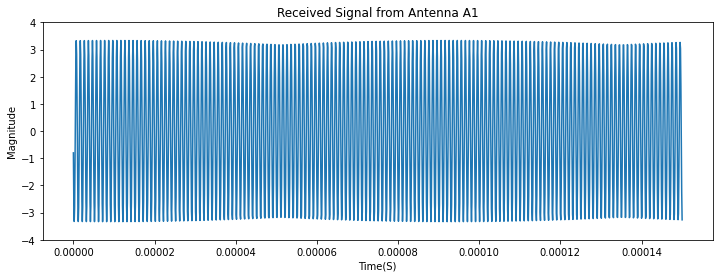

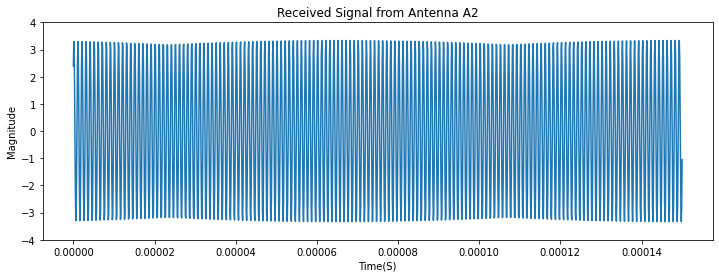

In [ ]:
x1=(2*math.pi*fm)*t
deltaD=R*np.cos(x1-(theta*math.pi)/180)
phi1=(2*math.pi/lambdaA)*(d-deltaD)
phi2=(2*math.pi/lambdaA)*(d+deltaD)

Va1=E*np.sin(2*math.pi*(fc+f0)*t-phi1)
Va2=E*np.sin(2*math.pi*(fc-f0)*t-phi2)

plt.figure(figsize=(12,4))
plt.plot(t[:1501],Va1[:1501])
plt.ylim(-4,4)
plt.title('Received Signal from Antenna A1')
plt.xlabel('Time(S)')
plt.ylabel('Magnitude')

plt.figure(figsize=(12,4))
plt.plot(t[:1501],Va2[:1501])
plt.ylim(-4,4)
plt.title('Received Signal from Antenna A2')
plt.xlabel('Time(S)')
plt.ylabel('Magnitude')



###Question 3
Now consider a third antenna located at the origin in addition to the rotating antennas, transmitting a carrier of frequency fc which is amplitude modulated by a message signal is sin(2πfmt). Using matlab/python write code to simulate above scenario and plot the signal received by the target.
Note: All the parameters given below are of a hypothetical system.


• fc =107Hz 

• f0 =960Hz 

• fm =30Hz 

• d = 200km 

• θ = 30◦



$V_{A_0}=E(1-Msin(2\pi f_mt))sin(2\pi f_ct-\frac{2\pi d}{\lambda_c}d)$

Therefore, signal recieved ath the target,

$=V_{A_0}+V_{A_1}+V_{A_2}$






Text(0, 0.5, 'Magnitude')

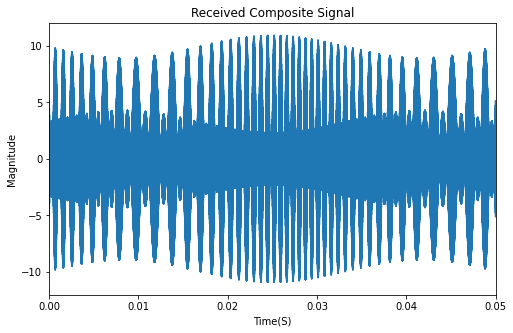

In [ ]:
Va0=E*(1-M*np.sin(2*math.pi*fm*t))*np.sin(2*math.pi*fc*t-phi)
Vrx=Va0+Va1+Va2

plt.figure(figsize=(8,5))
plt.plot(t,Vrx)
plt.xlim(0,0.05)
plt.title('Received Composite Signal')
plt.xlabel('Time(S)')
plt.ylabel('Magnitude')

<function matplotlib.pyplot.show>

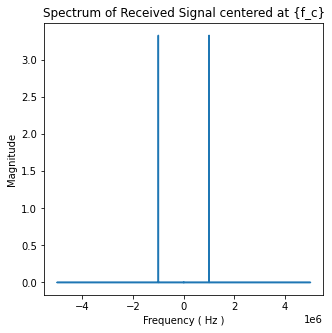

In [ ]:
N=t.shape[-1]
#print (N)
Vrx_fft=fft(Vrx)
Vrxw=Vrx_fft*2.0/N
Vrxw_abs=np.abs(Vrxw)
f=fftfreq(N,(1.0/fs))

plt.figure(figsize=(5,5))
plt.plot(f,Vrxw_abs)

plt.title('Spectrum of Received Signal centered at {f_c}')
plt.xlabel('Frequency ( Hz )')
plt.ylabel('Magnitude')
plt.show



###Question 4
Implement the receiver of the target and demodulate the above signal using mat- lab/python and plot the signals at each demodulation stage. Determine θ using the demodulated signal.


Original component
$=E(-Msin(2\pi f_mt)+2cos(2\pi f_0t+\delta cos(2\pi f_mt-\frac{\theta \pi}{180})))$

Modulated Signal$= V_{RX}[2sin(2\pi f_ct-\frac{2\pi d}{\lambda_c})]$

A butterworth filter was used to filter the signal.

Then the original signal is compared with the demodulated signal.




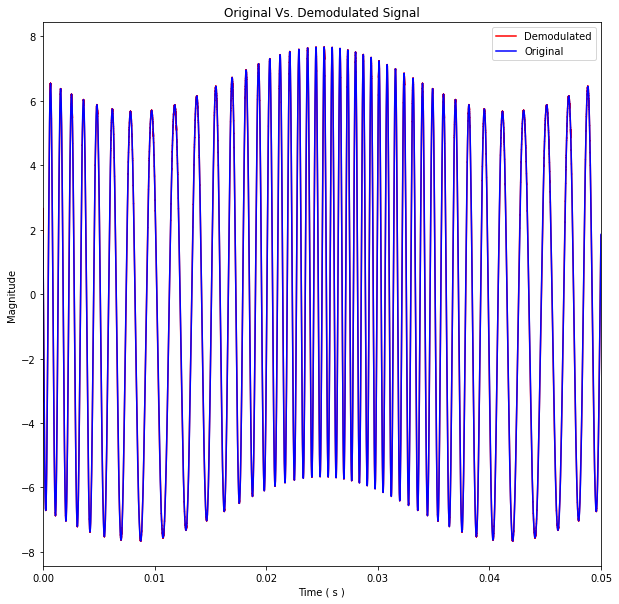

In [ ]:
modulated=Vrx*(2*np.sin(2*math.pi*fc*t-phi))
num,den=butter(10,fc*2/fs, btype='lowpass', analog=False)
demod_am=lfilter(num, den, modulated)
demod_am=demod_am - np.mean(demod_am) 
orig_comp=E*(-M*np.sin(2*math.pi*fm*t)+2*np.cos(2*math.pi*f0*t+delta*np.cos(2*math.pi*fm*t-theta*math.pi/180)))

fig= plt.figure(figsize=(10,10))
plt.plot(t, demod_am, 'r',label="Demodulated")
plt.plot(t, orig_comp, 'b',label="Original")
plt.title('Original Vs. Demodulated Signal')
plt.xlabel('Time ( s )') 
plt.ylabel('Magnitude')
plt.xlim((0, 0.05))
plt.legend(loc="best")
plt.show()


Original signal and demodulated signal falls on top of each other.

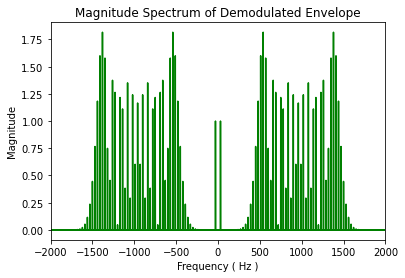

In [ ]:
fft_demod_am=fft(demod_am)
demod_envW=(2.0/N) * np.abs(fft_demod_am)
plt.plot(f,demod_envW,'g')

plt.xlabel('Frequency ( Hz )')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Demodulated Envelope')
plt.xlim((-2000,2000))
plt.show()


A lowpass bandwidth of 35Hz was selected for this. 

An ideal bandpass filter was used for this one.

We have compared this filtered signal with the original one ($EMsin(2\pi f_mt)$)


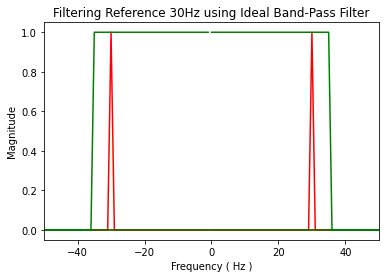

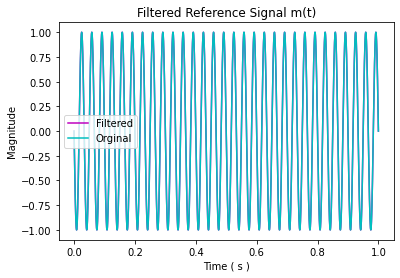

In [ ]:
lowpass=np.zeros((1,N))
middle=round(N/2)+1
lowpass_bw=35
lowpass[0,0:lowpass_bw+1]= np.ones((1,lowpass_bw+1))
lowpass[0,-lowpass_bw:]=np.ones((1,lowpass_bw))

demod_refW=fft_demod_am*lowpass[0]
filt_ref=np.real(ifft(demod_refW))

originalRef=-E*M*np.sin(2*math.pi*fm*t)

plt.plot(f, 2.0/N * np.abs(demod_refW),"r")
plt.plot(f,lowpass[0],"g")
plt.xlabel('Frequency ( Hz )')
plt.ylabel('Magnitude')
plt.title('Filtering Reference 30Hz using Ideal Band-Pass Filter')
plt.xlim((-50,50))
plt.show()

plt.plot(t, filt_ref, 'm',label="Filtered")
plt.plot(t, originalRef, 'c',label="Orginal")
plt.xlabel('Time ( s )')
plt.ylabel('Magnitude')
plt.title('Filtered Reference Signal m(t)')
plt.legend(loc="best")
plt.show()


A variable 30Hz component was filtered out using an ideal bandpass filter with a bandwidth of 1200Hz.

This was then compared with the original variable component,

$2Ecos(2\pi f_0t+\delta cos(2\pi f_m t-\frac{\theta \pi}{180}))$

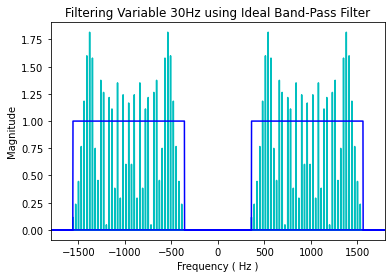

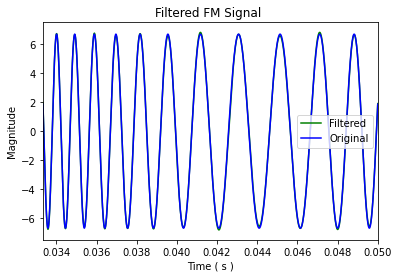

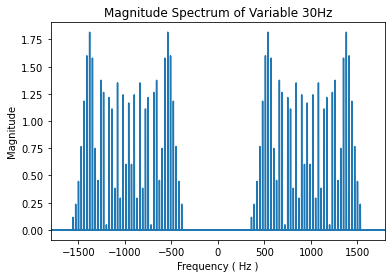

In [ ]:
bandpass_bw=1200
middle=int(bandpass_bw/2)
bandpass=np.zeros((1,N))
bandpass[0,f0-middle:f0+middle]=np.ones((1,bandpass_bw))
bandpass[0,-f0-middle:-f0+middle] = np.ones((1,bandpass_bw))
filt_var_w=fft_demod_am*bandpass[0]
filt_var= np.real(ifft(filt_var_w))
orig_var = 2*E*np.cos(2*np.pi*f0*t + delta*np.cos(2*math.pi*fm*t-theta*math.pi/180))

filt_var_30=2*np.abs(filt_var_w)/N
plt.plot(f, filt_var_30,"c")
plt.plot(f, bandpass[0],"b")
plt.xlabel('Frequency ( Hz )') 
plt.ylabel('Magnitude')
plt.title('Filtering Variable 30Hz using Ideal Band-Pass Filter')
plt.xlim((-1800,1800))
plt.show()

plt.plot(t, filt_var,"g",label="Filtered")
plt.plot(t, orig_var,"b",label="Original")
plt.xlabel('Time ( s )')
plt.ylabel('Magnitude')
plt.title('Filtered FM Signal ')
plt.xlim((1/fm ,1.5/fm))
plt.legend(loc="best")
plt.show()

plt.plot(f,filt_var_30)
plt.xlabel('Frequency ( Hz )') 
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Variable 30Hz')
plt.xlim((-1800,1800))
plt.show()

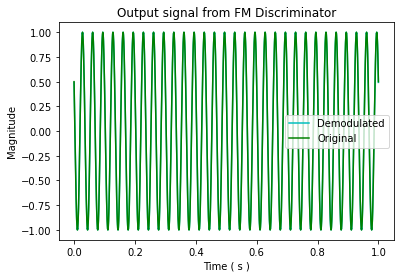

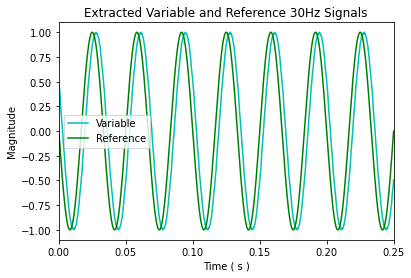

In [ ]:
df=fm*delta
rx=filt_var*np.exp(-1j*2*math.pi*f0*t)
lowpass_bw=1000
lowpass=np.zeros((1,N))
lowpass[0,0:lowpass_bw+1]=np.ones((1,lowpass_bw+1))
lowpass[0,-lowpass_bw:]=np.ones((1,lowpass_bw))

rx_fft=fft(rx)*lowpass[0]
rx_filtered=ifft(rx_fft)

phiA=np.arctan2(np.imag(rx_filtered), np.real(rx_filtered))

demod_var=np.diff(np.unwrap(phiA)/(2*math.pi*df*(t[1]-t[0])))
orig_fm=-np.sin(2*np.pi*fm*t-theta*math.pi/180)

plt.plot(t[:-1], demod_var, 'c',label="Demodulated")
plt.plot(t, orig_fm, 'g',label="Original")
plt.xlabel('Time ( s )')
plt.ylabel('Magnitude');
plt.title('Output signal from FM Discriminator')
plt.legend(loc="best")
plt.show()

plt.plot(t[:-1], demod_var, 'c',label="Variable")
plt.plot(t, filt_ref, 'g',label="Reference")
plt.xlabel('Time ( s )')
plt.ylabel('Magnitude')
plt.title('Extracted Variable and Reference 30Hz Signals')
plt.xlim((0,0.25))
plt.legend(loc="best")
plt.show()



In [ ]:
a=demod_var-np.mean(demod_var)
b=filt_ref-np.mean(filt_ref)

var_w=fft(a)
ref_w=fft(b)

var_index=np.argmax(np.abs(var_w))
ref_index=np.argmax(np.abs(ref_w))

var_phase=np.angle(var_w[var_index])
ref_phase=np.angle(ref_w[ref_index])

phase_diff=np.abs(var_phase-ref_phase)*180/math.pi

print("Phase Differance =", phase_diff)

Phase Differance = 30.000624843529337


###Question 5

In 3 we assumed two antennas are rotated. This rotation can be electronically simulated by a circular array of antenna elements. Taking this scenario into account write a matlab/python code to transmit the same signals as in 3. Compare the received signal by the target with that of 3. Note: Cosine blending must be utilized while transmitting. Demodulation in not required.


In [ ]:
antennas=48
fb=2*math.pi*fm*antennas/4
pulse_width=2/(fm*antennas)
n_sample_halfwidth=int(0.5*pulse_width*fs)+1
n_samples_period=int(fs/fm)+1
rep=31
beta_angle=360/antennas
train_t=np.arange(0,2/fm,1/fs)

sin_pulse=np.sin(fb*train_t)
sin_pulse[2*n_sample_halfwidth-1:n_samples_period]=0
sin_train=np.array(list(sin_pulse[:n_samples_period])*rep)

cos_pulse=np.cos(fb*train_t)
cos_pulse[n_sample_halfwidth-1:n_samples_period-n_sample_halfwidth]=0
cos_train=np.array(list(cos_pulse[:n_samples_period])*rep)



In [ ]:
comp=0
for i in range(antennas):
  if i==0:
    angle=beta_angle/2
    pulse=cos_train
  else:
    angle+=beta_angle
    pulse=np.array(list(np.zeros(((i-1)*n_sample_halfwidth)))+list(sin_train))
  blend=pulse[0:N]
  dx=R*np.cos((theta-angle)*math.pi/180)
  ph_s1=2*math.pi*(d-dx)/lambdaA
  ph_s2=2*math.pi*(d+dx)/lambdaA

  upper_s=E*np.sin(2*math.pi*(fc+f0)*t-ph_s1)*blend
  lower_s=E*np.sin(2*math.pi*(fc-f0)*t-ph_s2)*blend
  comp=comp+upper_s+lower_s


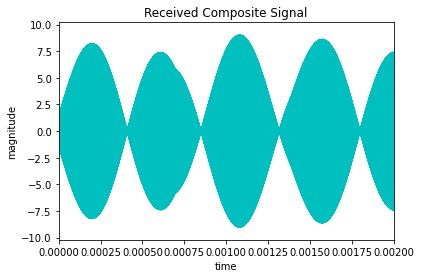

In [ ]:
plt.plot(t, comp,"c")
plt.xlim((0, 0.002))
plt.title('Received Composite Signal')
plt.xlabel('time')
plt.ylabel('magnitude')
plt.show()